In [2]:
import os, json, glob, sys, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import keras.backend.tensorflow_backend as K
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

C:\Users\leesoojin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
data = pd.read_csv('7m_after_prepro.csv')

In [4]:
print(data.head())

   2018-06-01  \
0  2018-06-01   
1  2018-06-01   
2  2018-06-01   
3       신문A2면   
4  2018-06-01   

  종대 신구 총장 사익 추구 전혀 없 오류 우회 위한 함수 추가 교육부 사립대 소송 경비 집행 원칙 부합 해명 지디 넷 코리아 방은주 기자 종대 서울 중앙지 검 지난 일 총장 사립 학교 법 위반 및 업무상 횡령 혐의 구속 기소 대해 신구 총장 임기 동안 사익 추구 전혀 없 일 해명 했 종대 총장 재임 기간 기관 대학 교육 자산 박물관 유물 원 가치 모두 인도 라는 소송 기숙사 신축 과정 선정 사업자 지불 해 교비 편입 입찰 보증금 원 반환 라는 소송 대학 구입 건물 강의실 학생 동아리 실 사용 위한 명도 소송 부당 연봉 인상 요구 소송 이 대해 종대 유물 관련 소송 법원 최종 승소 해 박물관 유물 소중 학교 교육 자산 모두 지켰 그 학교 건물 명도 소송 승소 현재 교육 사용 입찰 보증금 원 원 교비 지출 대학 재정 도움 설명 했 종대 교육 재산 관련 소송 순수 대학 업무 법인 무관 소송비용 당연히 교비 지출 없 종대 소송비용 지출 교육부 사립 대학 소송 경비 집행 원칙 부합 법률 전문가 자문 지출 해명 했 교육부 집행 원칙 다르 검찰 소송 비용 교비 지출 안 된다고 전제 지출 총장 개인 업무 횡령 기소 설명 종대 이 교비 지출 허용 범위 오해 법원 바로 잡힐 확신 한다 덧붙였 이 어 종대 신구 총장 재임 년 간 개인 이익 추구 경우 전혀 없 대학 발전 매진 했 결과 종대 년 아시아 대 대학 진입 했 현재 명 해외 유학생 는 명문 대학 발 했 밝혔 방은주 기자 네이버 채널 지디 넷 코리아 구독 해 종대 진대제 정통부 장관 초청 차 산업 혁명 강연   \
0  서울 경제 체 험기 전자 스마트폰 씽 큐 써 오류 우회 위한 함수 추가 서울 경제 ...                                                                            

In [5]:
print(len(data.iloc[:, 0]))

100792


10만개의 데이터.

In [6]:
df = data.sample(frac=1)
print(df.iloc[0:10,2])

55243    3
27321    1
28633    1
90971    0
41017    3
16142    2
94475    0
55328    3
39028    3
10476    2
Name: 2, dtype: int64


In [7]:
df2 = data.sample(frac=1).reset_index(drop=True)
print(df2.iloc[0:10,2])

0    3
1    1
2    2
3    2
4    1
5    3
6    1
7    2
8    1
9    0
Name: 2, dtype: int64


In [8]:
print(len(df2.iloc[:, 0]))

100792


# df2  로 진행!

In [9]:
X = df2.iloc[:, 1].values
y = df2.iloc[:, 2].values

In [10]:
print(len(X), len(y))

100792 100792


In [11]:
nb_classes = len(set(y))
print(nb_classes)
y = np_utils.to_categorical(y, nb_classes)
print(y)

4
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [15]:
#? 10만개 데이터는 무난하게 들어가네?

max_word = 5000
max_len = 500

tok = Tokenizer(num_words = max_word)
tok.fit_on_texts(X)
print(len(tok.word_index))


#여기서 4개 파일 전부 tok.fit_on_texts() 하고나서 넘어가기.


92158


# 그리고 sequences나 이런것들 월별로 다 따로하고 훈련을 다 따로 시킨다.

In [13]:
sequences = tok.texts_to_sequences(X)
print(len(sequences[0]))
print(sequences[0])

157
[150, 659, 50, 1845, 667, 627, 3073, 832, 19, 3, 922, 15, 278, 31, 37, 659, 50, 1845, 667, 1, 19, 3, 922, 1, 150, 659, 50, 1845, 667, 627, 115, 3073, 1476, 3, 1476, 127, 587, 61, 356, 1980, 150, 659, 50, 1845, 667, 627, 115, 3073, 832, 26, 52, 3103, 922, 150, 659, 50, 3279, 3074, 55, 6, 1476, 61, 66, 1648, 958, 105, 3511, 942, 175, 703, 652, 713, 44, 1471, 243, 150, 1789, 697, 4690, 717, 72, 627, 115, 1698, 3073, 1, 150, 296, 2, 42, 659, 50, 1845, 667, 818, 620, 108, 1196, 1899, 2485, 4303, 64, 8, 84, 463, 1028, 1, 4562, 446, 4786, 1184, 667, 1, 152, 3549, 57, 101, 2664, 101, 280, 4544, 183, 659, 50, 1845, 667, 134, 2721, 3561, 3846, 4984, 4428, 164, 1, 19, 3, 922, 28, 24, 150, 659, 50, 1845, 667, 5, 15, 58, 80, 70, 2453, 15, 278, 14, 16, 10, 12, 11]


In [14]:
print(len(tok.word_index))

92158


In [34]:
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
print(sequences_matrix)
print(sequences_matrix[0])
print(len(sequences_matrix[0]))

[[   0    0    0 ...   20   24   22]
 [   0    0    0 ...   20   24   22]
 [   0    0    0 ...   20   24   22]
 ...
 [   0    0    0 ... 1437   24   22]
 [   0    0    0 ...   28   24   22]
 [ 140  563 1343 ...   20   24   22]]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0  

In [35]:
print(len(tok.word_index))

X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

92607
(80633, 500)
(80633, 4)


In [36]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    
    model.add(Embedding(max_word, 64, input_length=max_len))
    model.add(LSTM(60, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/hwang_lstm.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=7)

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 60)           30000     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 204       
Total para

In [39]:
hist = model.fit(X_train, y_train, batch_size=500, epochs=20, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 64506 samples, validate on 16127 samples
Epoch 1/20
64506/64506 [==============================] - 101s 2ms/step - loss: 0.6062 - acc: 0.7623 - val_loss: 0.2408 - val_acc: 0.9216

Epoch 00001: val_loss improved from inf to 0.24078, saving model to ./model/predict_korea_news_LSTM.model
Epoch 2/20
64506/64506 [==============================] - 100s 2ms/step - loss: 0.2393 - acc: 0.9206 - val_loss: 0.1634 - val_acc: 0.9407

Epoch 00002: val_loss improved from 0.24078 to 0.16343, saving model to ./model/predict_korea_news_LSTM.model
Epoch 3/20
64506/64506 [==============================] - 99s 2ms/step - loss: 0.1744 - acc: 0.9468 - val_loss: 0.1462 - val_acc: 0.9500

Epoch 00003: val_loss improved from 0.16343 to 0.14623, saving model to ./model/predict_korea_news_LSTM.model
Epoch 4/20
64506/64506 [==============================] - 99s 2ms/step - loss: 0.1351 - acc: 0.9605 - val_loss: 0.1389 - val_acc: 0.9539

Epoch 00004: val_loss improved from 0.14623 to 0.13885, saving model t

In [40]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

20159/20159 [==============================] - 159s 8ms/step
정확도 : 0.9587


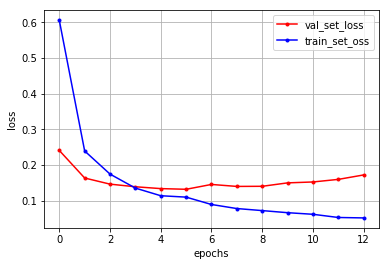

In [41]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

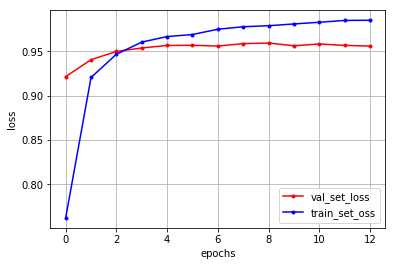

In [42]:
y_vloss = hist.history['val_acc']
y_loss = hist.history['acc']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()